## Training kNN Model Applying SFS

### Step 1 | Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from plot_confusion_matrix import plot_confusion_matrix

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Train model with selected hyperparameter from tuning function and applying SFS

In [4]:
knn = KNeighborsClassifier(metric= 'manhattan',n_neighbors = 17, weights = 'distance')

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfs', SequentialFeatureSelector(knn, n_features_to_select='auto', tol=None, direction='forward', scoring="accuracy", cv=cv, n_jobs=-1)),
    ('knn', knn)
])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                           estimator=KNeighborsClassifier(metric='manhattan',
                                                                          n_neighbors=17,
                                                                          weights='distance'),
                                           n_jobs=-1, scoring='accuracy')),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=17,
                                      weights='distance'))])

In [7]:
selected_features = X_train.columns[pipe.named_steps['sfs'].get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'SMOKE', 'SCC', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Walking']


In [8]:
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train_sfs)

StandardScaler()

In [11]:
knn_pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

In [12]:
y_pred = knn_pipeline.predict(X_train_sfs)
accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9568    0.9767    0.9667      2018
           1     0.9353    0.9448    0.9401      2465
           2     0.9335    0.9181    0.9258      1942
           3     0.9458    0.9509    0.9484      2018
           4     0.9800    0.9699    0.9750      2328
           5     0.9996    0.9931    0.9963      2598
           6     1.0000    0.9985    0.9992      3237

    accuracy                         0.9678     16606
   macro avg     0.9644    0.9646    0.9645     16606
weighted avg     0.9679    0.9678    0.9679     16606



In [13]:
y_pred = knn_pipeline.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8752    0.8891    0.8821       505
           1     0.7850    0.7990    0.7920       617
           2     0.7279    0.6784    0.7022       485
           3     0.7208    0.7480    0.7342       504
           4     0.8223    0.8110    0.8166       582
           5     0.9416    0.9431    0.9424       650
           6     0.9938    0.9963    0.9951       809

    accuracy                         0.8524      4152
   macro avg     0.8381    0.8378    0.8378      4152
weighted avg     0.8520    0.8524    0.8520      4152



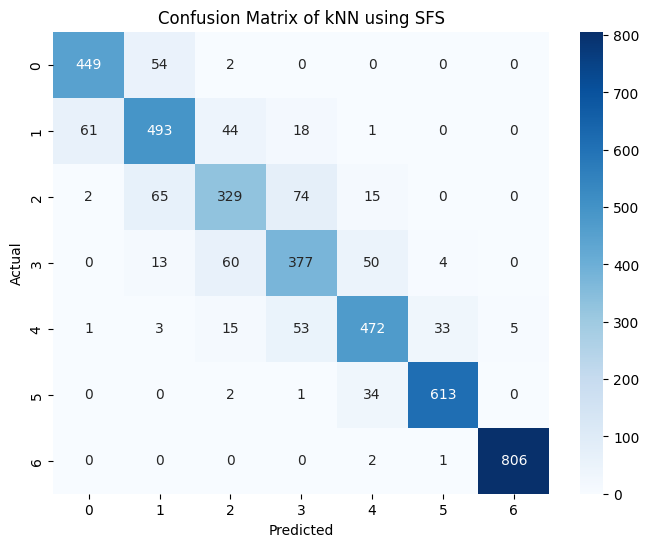

In [14]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of kNN using SFS')